<a href="https://colab.research.google.com/github/ChirahCasper/DataAnalysiswithpython/blob/main/neuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

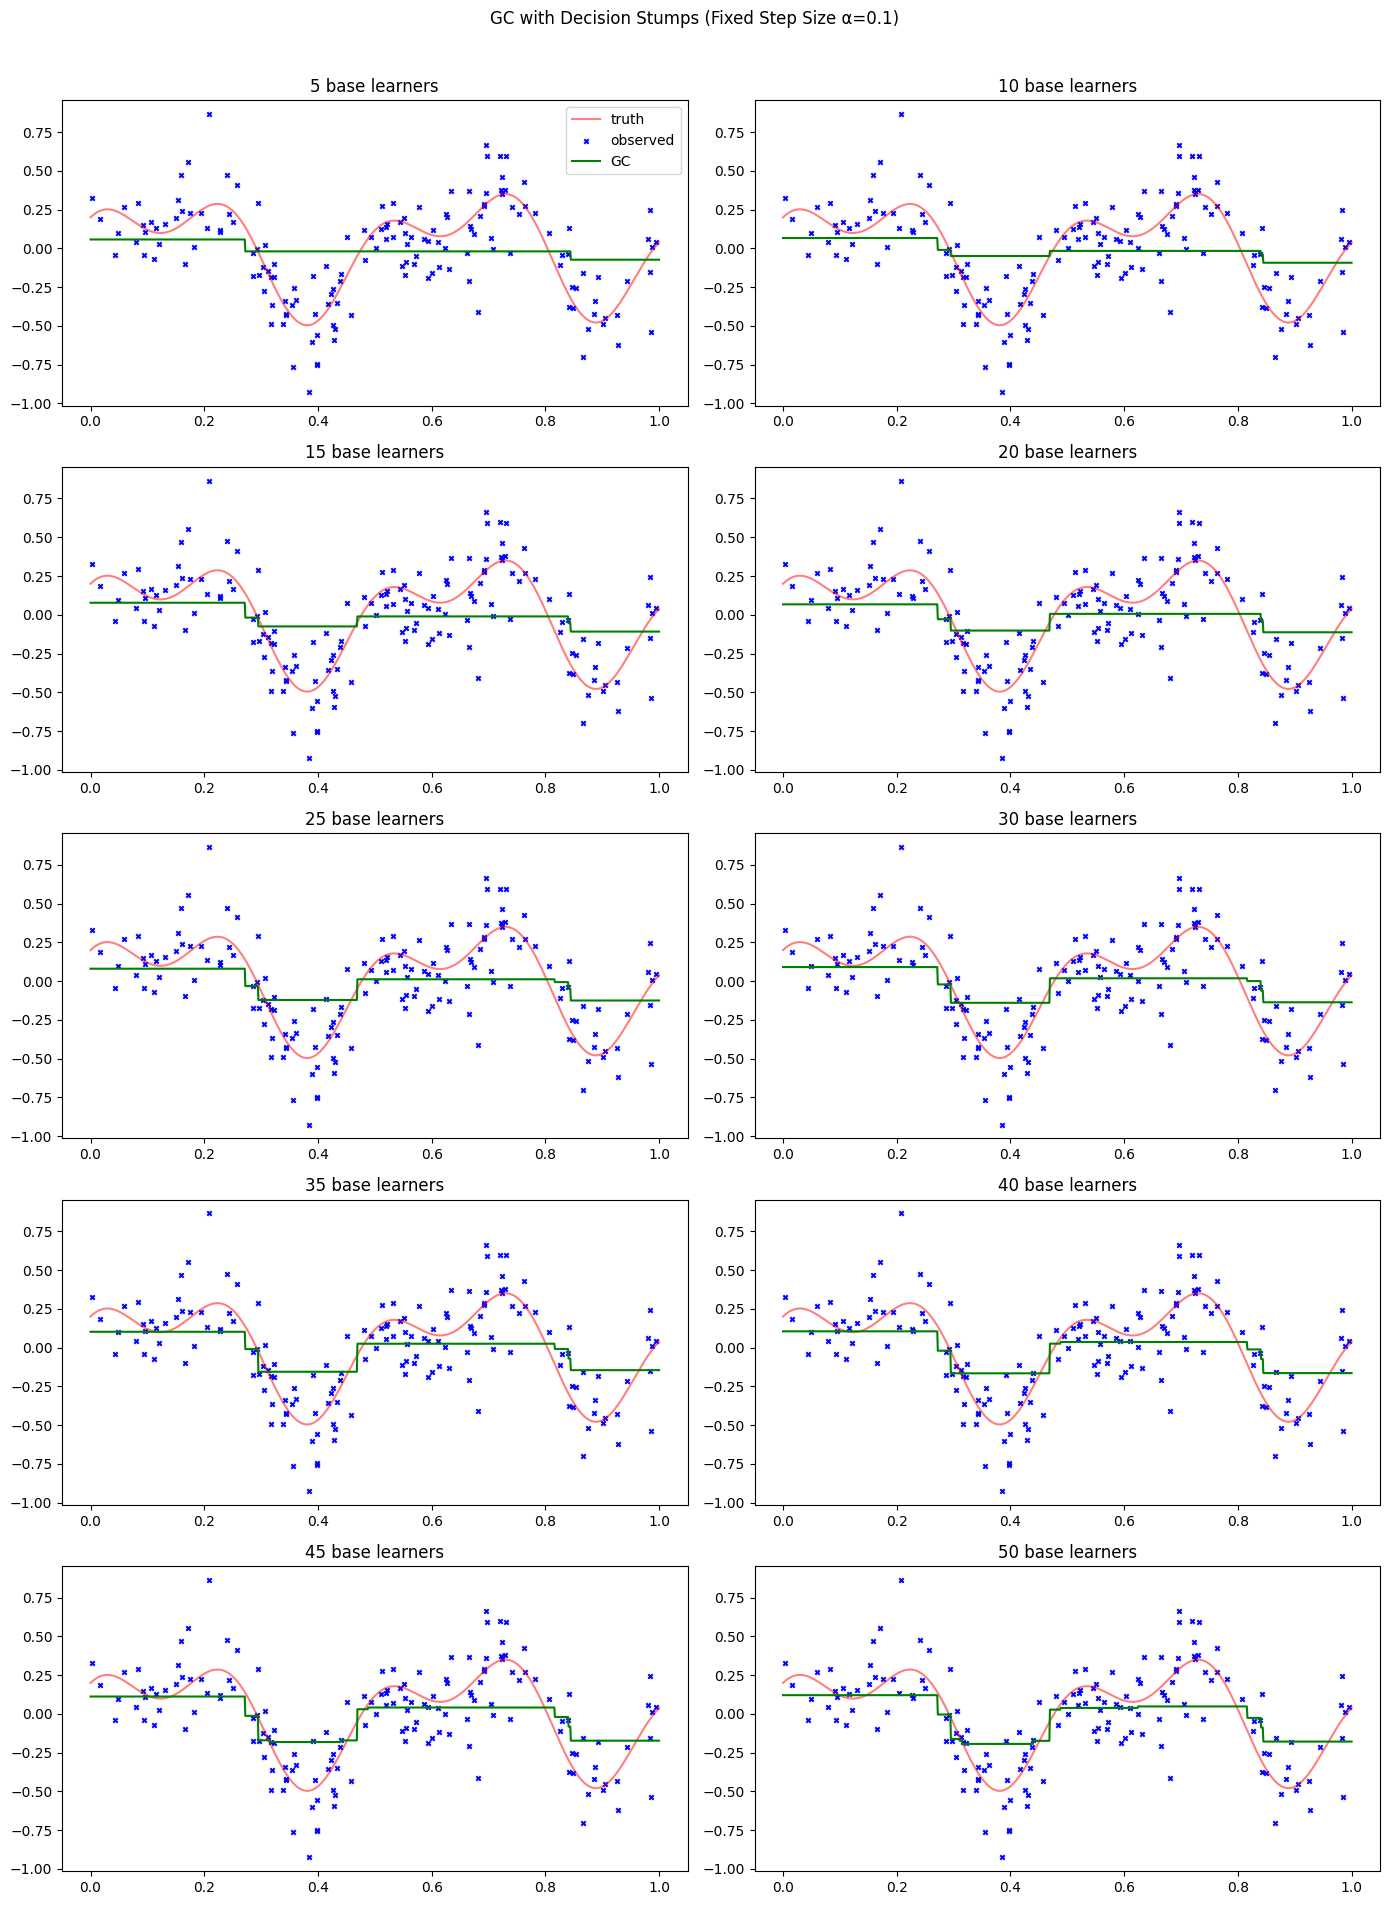

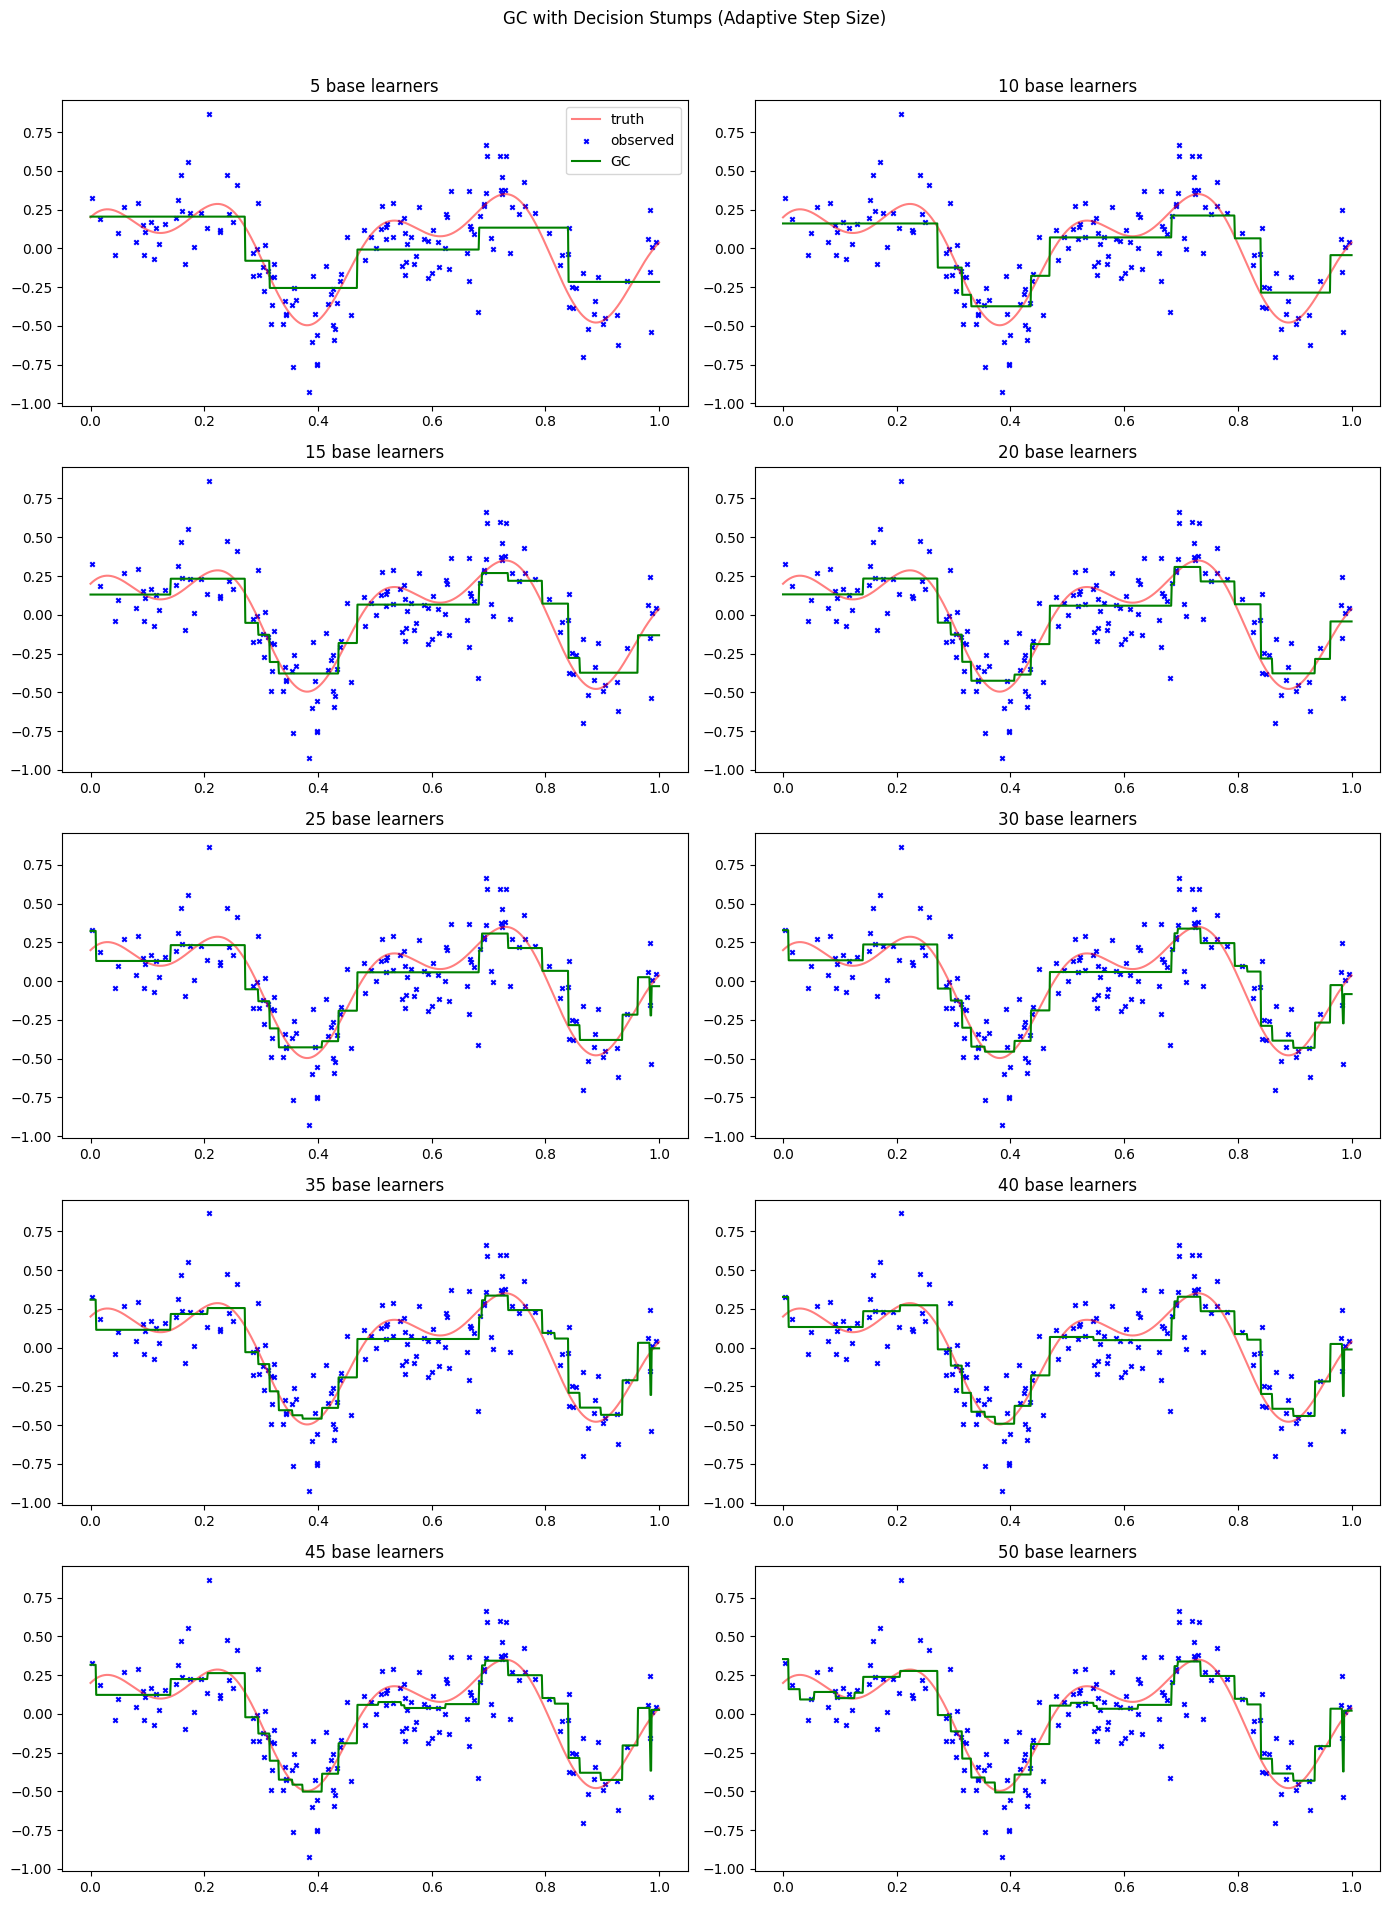

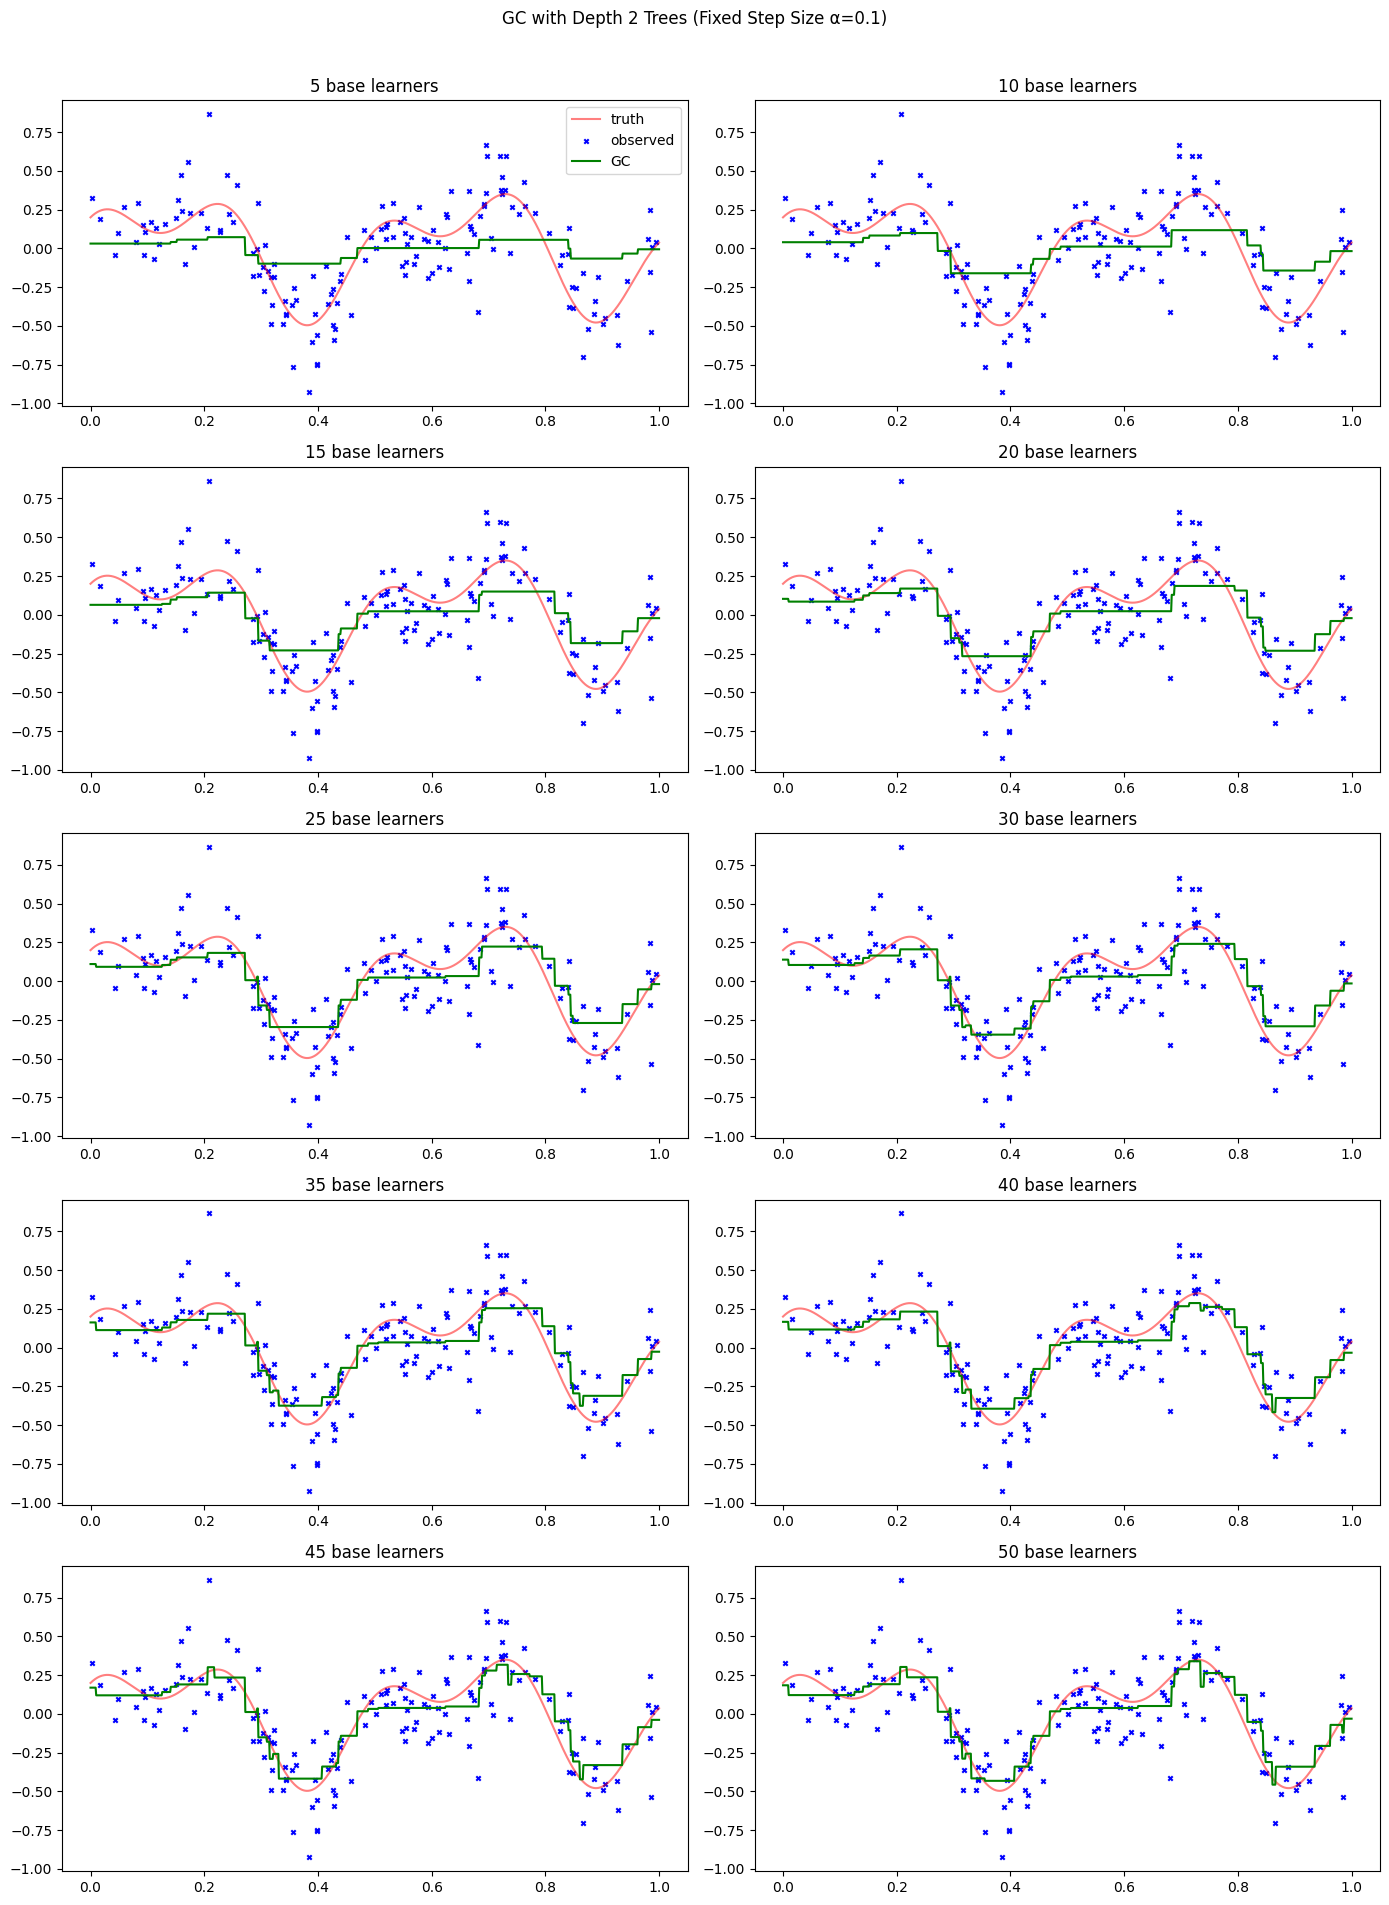

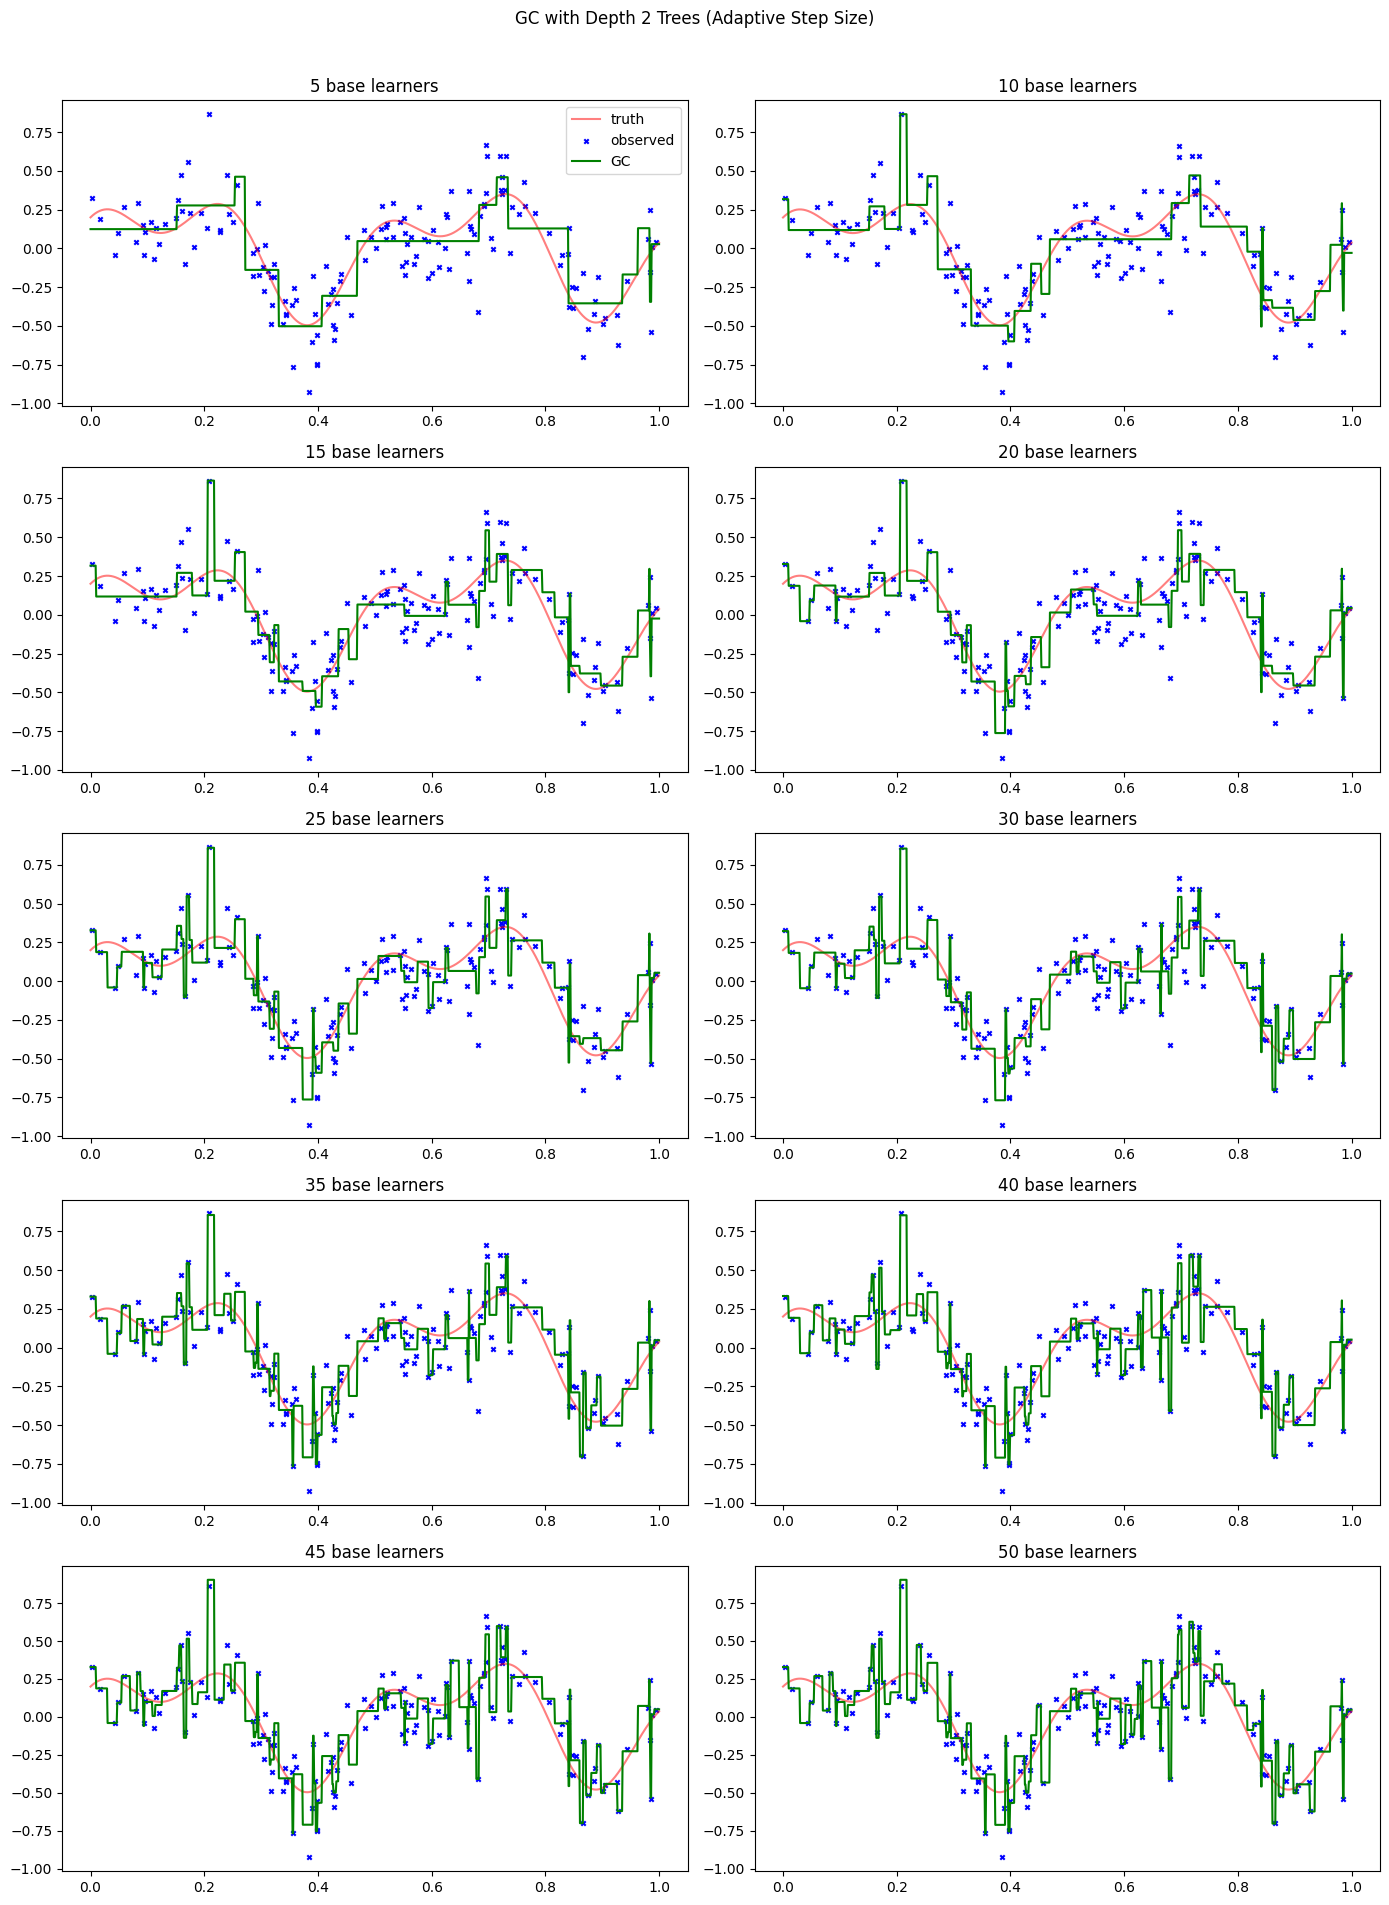

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

def f(x):
    return 0.3 * np.sin(12 * x) + 0.2 * np.cos(25 * x)

def f_sampler(f, n, sigma=0.2):
    X = np.random.rand(n)
    y = f(X) + sigma * np.random.randn(n)
    return X, y

np.random.seed(123)
X, y = f_sampler(f, 160, sigma=0.2)
X = X.reshape(-1, 1)
xx = np.linspace(0, 1, 1000).reshape(-1, 1)

def gradient_combination(X, y, xx, n_learners, step_size='adaptive', max_depth=2):
    n = X.shape[0]
    f_pred = np.zeros(n)
    f_pred_xx = np.zeros(xx.shape[0])
    learners = []
    alphas = []
    for t in range(n_learners):
        residuals = y - f_pred
        stump = DecisionTreeRegressor(max_depth=max_depth)
        stump.fit(X, residuals)
        h_pred = stump.predict(X)
        h_pred_xx = stump.predict(xx)
        if step_size == 'adaptive':
            numerator = np.sum(h_pred * residuals)
            denominator = np.sum(h_pred ** 2) + 1e-10
            alpha = numerator / denominator
        else:
            alpha = step_size
        f_pred += alpha * h_pred
        f_pred_xx += alpha * h_pred_xx
        learners.append(stump)
        alphas.append(alpha)
    return f_pred_xx, learners, alphas

def plot_gc(X, y, xx, n_learners_list, step_size, max_depth, fig_title):
    fig, axes = plt.subplots(5, 2, figsize=(14, 20))
    axes = axes.ravel()
    for idx, n_learners in enumerate(n_learners_list):
        f_pred_xx, _, _ = gradient_combination(
            X, y, xx, n_learners, step_size=step_size, max_depth=max_depth
        )
        ax = axes[idx]
        ax.plot(xx, f(xx.ravel()), alpha=0.5, color='red', label='truth')
        ax.scatter(X, y, marker='x', color='blue', label='observed', s=10)
        ax.plot(xx, f_pred_xx, color='green', label='GC')
        ax.set_title(f'{n_learners} base learners')
        if idx == 0:
            ax.legend()
    plt.suptitle(fig_title)
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.show()

n_learners_list = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

plot_gc(X, y, xx, n_learners_list, step_size=0.1, max_depth=2,
        fig_title='GC with Depth 2 Trees (Fixed Step Size α=0.1)')

plot_gc(X, y, xx, n_learners_list, step_size='adaptive', max_depth=2,
        fig_title='GC with Depth 2 Trees (Adaptive Step Size)')
